## Integración Montecarlo

## Úrsula Vargas López 740388

### 31/03/2023

### NOTA, en esta tarea corregí la forma generalizada de montecarlo y montecarlo_general

1. Realizar las siguientes integrales. Poner los resultados en una tabla cuyas filas correspondan a la cantidad de términos utilizados en la aproximación (usar 10, 100, 1000, 10000 y 100000 términos) y cuyas columnas correspondan a las funciones.
    + $\int_{1}^{3} e^{x}\log(x)\text{d}x$.
    + $\int_1^3 \sin(x)\ln(x) \text{d}x$

In [88]:
import pandas as pd   #para hacer una tabla
import numpy as np



In [89]:
def f1(x):
    return np.exp(x)*np.log10(x)

def montecarlo(f,N,a,b):    #forma generalizada 
    u= np.random.uniform(a,b,N)
    return np.mean(f(u))*(b-a)
montecarlo(f1, 10, 1, 3)

7.527185310434156

In [90]:
def f2(x):
    return np.sin(x)*np.log(x)



In [91]:
import pandas as pd   #para hacer una tabla 

N= np.logspace(1,5,5) # para 10,100,1000, bla bla 

table= pd.DataFrame(columns=["Aproximación f1(x)","Aproximación f2(x)"], index=N)
table

,Aproximación f1(x),Aproximación f2(x)
10.0,NaN,NaN
100.0,NaN,NaN
1000.0,NaN,NaN
10000.0,NaN,NaN
100000.0,NaN,NaN


In [92]:
a= 1
b= 3

for i in N :
    
    aprox1 = montecarlo(f1,int(i),a,b)
    table.loc[i,"Aproximación f1(x)"] =  aprox1
    
    aprox2 = montecarlo(f2,int(i),a,b)
    table.loc[i,"Aproximación f2(x)"] =  aprox2
    
table
    

,Aproximación f1(x),Aproximación f2(x)
10.0,5.865996,0.797403
100.0,5.356294,0.872386
1000.0,6.113217,0.865921
10000.0,6.06916,0.866316
100000.0,6.112704,0.870094


2. Aproximar el área de la región descrita por

$$x^2+2y^2\leq-2x+8y-7$$

Poner los resultados en una tabla cuyas filas correspondan a la cantidad de términos utilizados en la aproximación (usar 10, 100, 1000, 10000 y 100000 términos) y en las columnas el valor de aproximación y el error relativo.

Definir unos límites adecuados $a_1$, $b_1$, $a_2$ y $b_2$, para la región $R=\left[a_1,b_1\right]\times\left[a_2,b_2\right]$

In [78]:
import numpy as np
import sympy as sp



In [79]:
def fun(x,y):
    return x**2+2*y**2<= -2*x+8*y-7

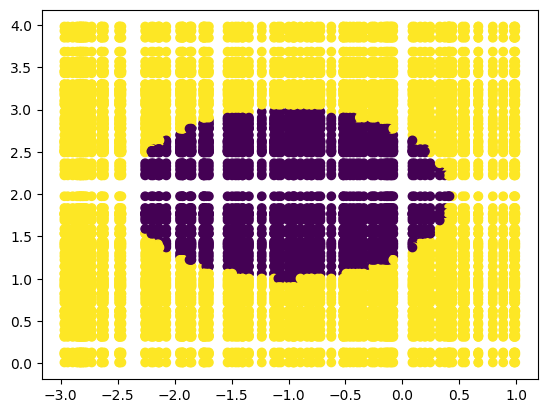

In [80]:
import matplotlib.pyplot as plt
%matplotlib inline

x = np.random.uniform(-3, 1, 100)
y = np.random.uniform(0, 4, 100)

X,Y = np.meshgrid(x,y)

plt.figure()
plt.scatter(X, Y, c =~fun(X,Y))

In [81]:
def montecarlo_general (region,ax,bx,ay,by,N):
    x = np.random.uniform( ax, bx ,N)
    y = np.random.uniform( ay, by ,N)
    B = region(x,y)
    AR = (bx-ax)*(by-ay)
    return np.mean(B)*AR

In [82]:
montecarlo_general(fun, -3,1,0,4,1000)

4.64

In [83]:
import pandas as pd   

N= np.logspace(1,5,5) # para 10,100,1000, bla bla 

table2= pd.DataFrame(columns=["Aproximación"], index=N)
table2

,Aproximación
10.0,NaN
100.0,NaN
1000.0,NaN
10000.0,NaN
100000.0,NaN


In [84]:
for i in N : 
    aprox = montecarlo_general(fun, -3,1,0,4,int(i)) 
    table2.loc[i,"Aproximación"] =  aprox
table2

,Aproximación
10.0,8.0
100.0,5.76
1000.0,4.352
10000.0,4.5648
100000.0,4.44208


In [85]:
A = [8,5.76,4.352,4.5648,4.44208]
A

[8, 5.76, 4.352, 4.5648, 4.44208]

In [86]:

table3= pd.DataFrame(columns=["Error Relativo"], )
table3

,Error Relativo


In [87]:
for i in A:
    crel= np.sqrt((1- int(i)/16)/(int(i)/16))
    error_relativo = (np.log10(crel))-((1/2)*np.log10(1000))
    table3.loc[i,"Error Relativo"] =  error_relativo

table3




,Error Relativo
8.00000,-1.5
5.76000,-1.328789
4.35200,-1.261439
4.56480,-1.261439
4.44208,-1.261439


3. Describe 3 casos de uso de integración Montecarlo en tu ingeniería.

Rentabilidad de proyectos: Calculamos la TIR y el VAN para poder determinar si es interesante hacer una inversión, o bien al contrario, qué inversión sería necesaria.


Riesgos: Hay dos elementos básicos en la estimación del riesgo, la probabilidad de que ocurra el evento y la gravedad. 

Utilidad: se usa para valorar proyectos empresariales, se realizan estimaciones y cuantas más proyecciones habrá mayor precisión en los resultados estimados.

REFERENCIAS: 
    
    Bank, E. S. (2018, September 4). El método Montecarlo en finanzas. El Blog De SelfBank by Singular Bank. https://blog.selfbank.es/el-metodo-montecarlo-en-finanzas/#:~:text=Qu%C3%A9%20es%20el%20m%C3%A9todo%20Montecarlo,sobre%20las%20que%20se%20construye